<a href="https://colab.research.google.com/github/vestinabert/Image_Processing/blob/main/Image_Processing_And_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving RIMG0100.jpg to RIMG0100 (1).jpg


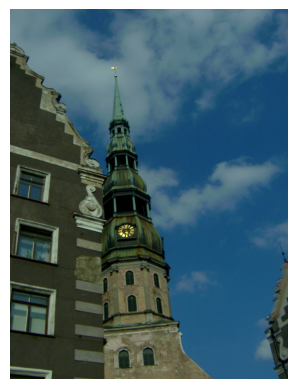

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Get the filename (first uploaded file)
filename = list(uploaded.keys())[0]

# Read the image using OpenCV
image = cv2.imread(filename)

# Convert image from BGR to RGB (OpenCV loads in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


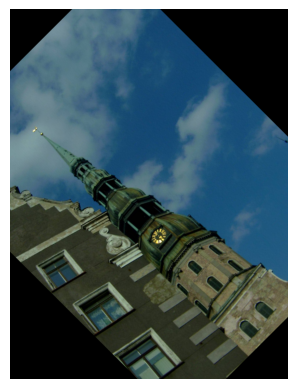

In [5]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Compute the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Apply rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    return rotated_image

# Example: Rotate image by 45 degrees
rotated = rotate_image(image, 45)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


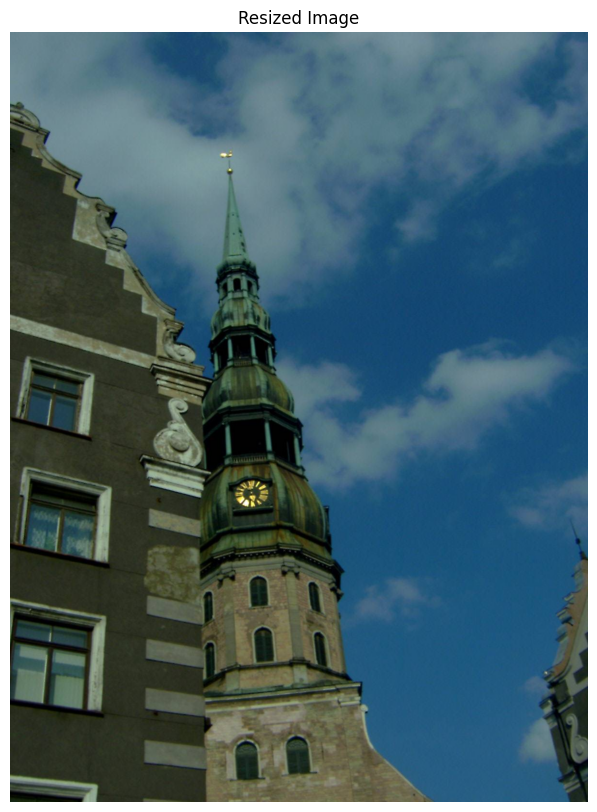

Original Size: (1600, 1200) (Height, Width)
Resized Size: (2560, 1920) (Height, Width)


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, scale_factor):

    # Calculate new dimensions
    new_width = max(1, int(image.shape[1] * scale_factor))
    new_height = max(1, int(image.shape[0] * scale_factor))

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    return resized_image

# Example usage: Scale the image by 1.6 (increase size)
scaled_image = resize_image(image, 1.6)

# Display the resized image
plt.figure(figsize=(10, 10))  # Adjust figure size to ensure proper visibility
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.title("Resized Image")
plt.show()

# Print original and new dimensions
print(f"Original Size: {image.shape[:2]} (Height, Width)")
print(f"Resized Size: {scaled_image.shape[:2]} (Height, Width)")


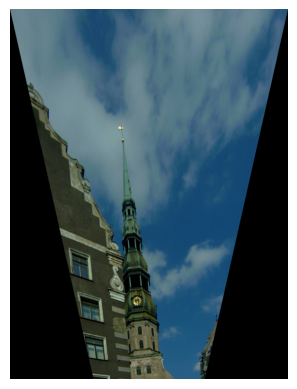

In [13]:
def perspective_transform(image):
    h, w = image.shape[:2]

    # Define four source points (corners)
    src_pts = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])

    # Define corresponding destination points
    dst_pts = np.float32([[0, 0], [w-1, 0], [int(0.3*w), h-1], [int(0.7*w), h-1]])

    # Compute perspective matrix
    matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)

    # Apply transformation
    transformed = cv2.warpPerspective(image, matrix, (w, h))

    return transformed

perspective_img = perspective_transform(image)
plt.imshow(cv2.cvtColor(perspective_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
